In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('results.csv', sep=';', header=0)
df['code_assistant_type'] = df['code_assistant_type'].str.replace('Assistant', '')
df.head()



,code_assistant_type,prompt_type,dataset_name,report_path,error_count,code_messages_missing_snippets,msg_count,analysis_message_limit,exception
0,LLaMA2Chat,ZeroShot,wine-quality.csv,reports/wine-quality_1_2024-01-23-23-56-21.pdf,4,0,2,8,Code assistant exceeded retry limit for code e...
1,LLaMA2Chat,FewShot,wine-quality.csv,reports/wine-quality_4_2024-01-23-23-57-20.pdf,0,4,8,8,NaN
2,OpenAI,ZeroShot,wine-quality.csv,reports/wine-quality_2_2024-01-23-23-58-53.pdf,0,0,8,8,NaN
3,OpenAI,FewShot,wine-quality.csv,reports/wine-quality_5_2024-01-23-23-59-57.pdf,0,0,1,8,timed out
4,Mixtral8x7B,ZeroShot,wine-quality.csv,reports/wine-quality_3_2024-01-24-00-00-37.pdf,0,0,5,8,Invalid response or text not found


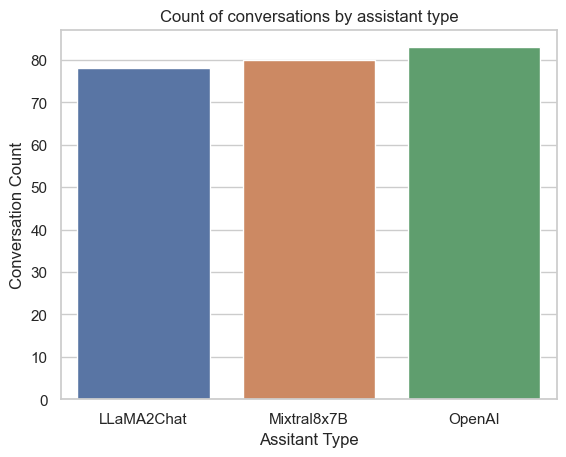

In [327]:


grouped = df.groupby('code_assistant_type').size().reset_index(name='counts')
grouped['code_assistant_type'] = grouped['code_assistant_type'].str.replace('Assistant', '')

sns.barplot(data=grouped, x='code_assistant_type', y='counts')

plt.xlabel('Assitant Type')
plt.ylabel('Conversation Count')
plt.title('Count of conversations by assistant type')

plt.show()


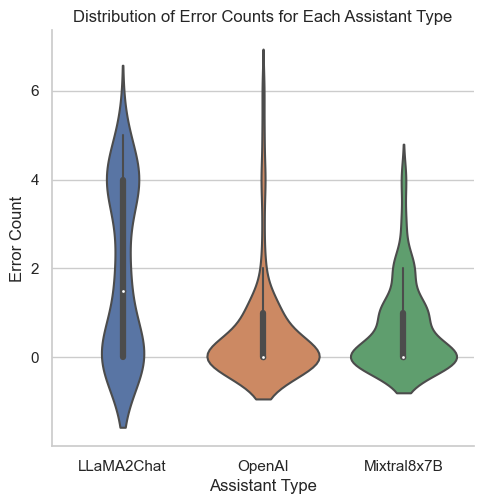

In [328]:
sns.catplot(data=df, x='code_assistant_type', y='error_count', kind='violin')

plt.xlabel('Assistant Type')
plt.ylabel('Error Count')
plt.title('Distribution of Error Counts for Each Assistant Type')

plt.show()

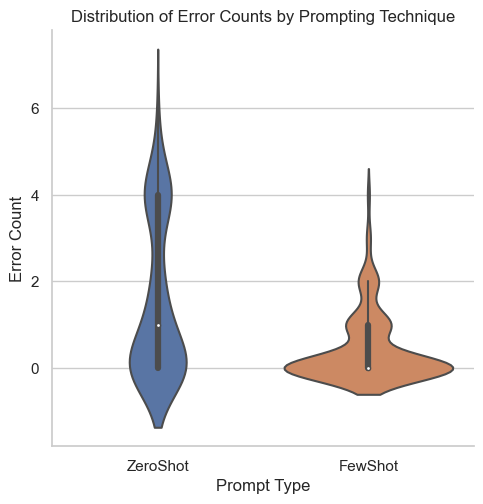

In [329]:
sns.catplot(data=df, x='prompt_type', y='error_count', kind='violin')

plt.xlabel('Prompt Type')
plt.ylabel('Error Count')
plt.title('Distribution of Error Counts by Prompting Technique')

plt.show()

Text(0.5, 1.0, 'Combined Distribution of Error Counts and Missing Snippets by Prompting Technique')

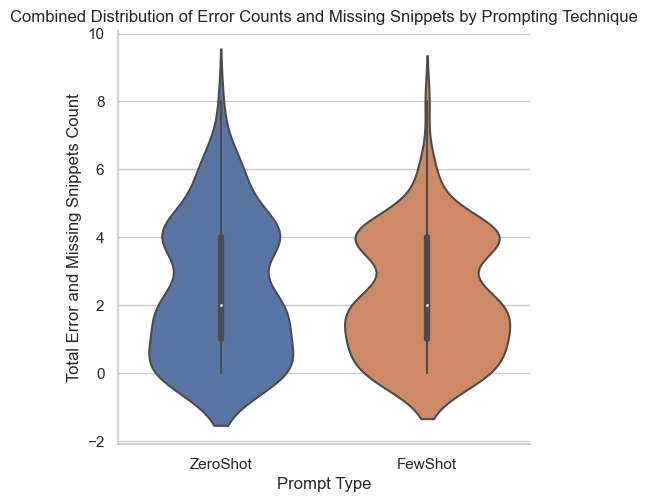

In [330]:
df['total_errors'] = df['error_count'] + df['code_messages_missing_snippets']

sns.catplot(data=df, x='prompt_type', y='total_errors', kind='violin')

plt.xlabel('Prompt Type')
plt.ylabel('Total Error and Missing Snippets Count')
plt.title('Combined Distribution of Error Counts and Missing Snippets by Prompting Technique')


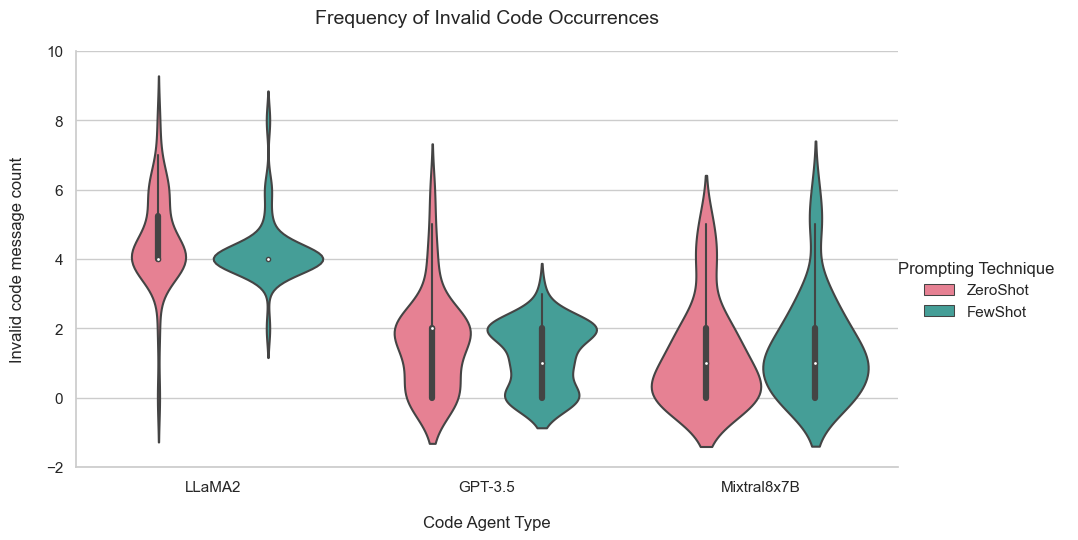

In [343]:
df["total_errors"] = df["error_count"] + df["code_messages_missing_snippets"]

assistant_maping = {
    "LLaMA2Chat": "LLaMA2",
    "OpenAI": "GPT-3.5",
}

df['code_assistant_type'] = df['code_assistant_type'].replace(assistant_maping)

ax = sns.catplot(
    data=df,
    x="code_assistant_type",
    y="total_errors",
    hue="prompt_type",
    kind="violin",
    aspect=1.8,
    palette="husl",
)


new_title = "Prompting Technique"
ax._legend.set_title(new_title)
legend = ax._legend
legend.set_bbox_to_anchor((1.05, 0.5))

plt.xlabel("Code Agent Type", fontsize=12, labelpad=15)
plt.ylabel("Invalid code message count", fontsize=12, labelpad=15)
plt.title(
    "Frequency of Invalid Code Occurrences",
    fontsize=14,
    pad=20,
)
plt.ylim(-2, 10)

# Errors are counted as the sum of error_count and code_messages_missing_snippets, since from the user's perspective this messages are not bringing any value to the progress of the analysis
# Check the data for the number
plt.savefig("prompting_technique_influence_code_generation.png", bbox_inches="tight", dpi=300)
#plt.show()

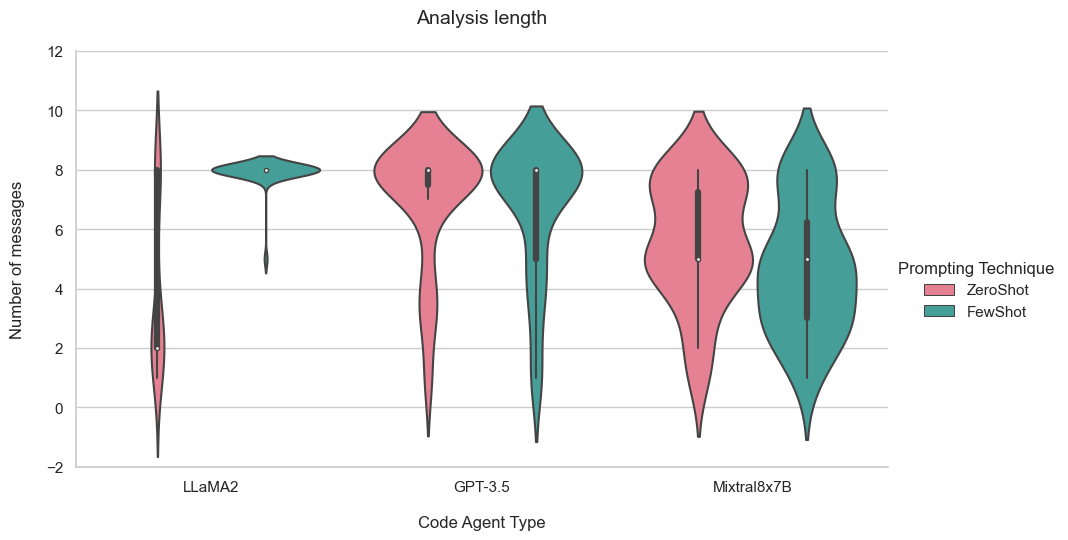

In [342]:
# msg_count distribution by model and pormpting technique
# Create a new column that is the sum of 'error_count' and 'code_messages_missing_snippets'

# Plotting the distribution grouped by both 'prompt_type' and 'code_assistant_type'
ax = sns.catplot(
    data=df, 
    x='code_assistant_type', 
    y='msg_count', 
    hue='prompt_type', 
    kind='violin',
    palette='husl',
    aspect=1.8,
    )

new_title = 'Prompting Technique'
ax._legend.set_title(new_title)
legend = ax._legend
legend.set_bbox_to_anchor((1.05, .5))
# Conversation length should be 8 if it is smaller, then it means that the conversation was terminated prematurely, due to the exception 
plt.xlabel('Code Agent Type', fontsize=12, labelpad=15)
plt.ylabel('Number of messages', fontsize=12, labelpad=15)
plt.title('Analysis length', fontsize=14, pad=20)
plt.ylim(-2,12)

#plt.show()
plt.savefig('prompting_technique_influence_msg_count.png', bbox_inches='tight', dpi=300)

/var/folders/yd/2rqckjys25zbdvvts64958bh0000gn/T/ipykernel_29712/437403272.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="code_assistant_type", y="success_rate", hue="prompt_type", data=df, palette="husl", ci=None)


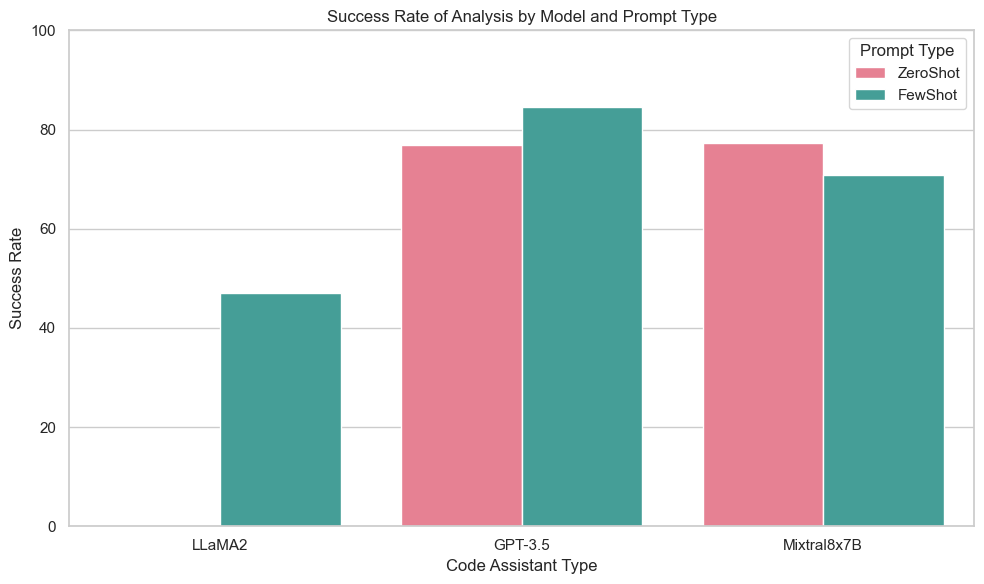

In [309]:
df['success_rate'] = (df['msg_count'] - df['total_errors']) / df['msg_count'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x="code_assistant_type", y="success_rate", hue="prompt_type", data=df, palette="husl", ci=None)
plt.title('Success Rate of Analysis by Model and Prompt Type')
plt.xlabel('Code Assistant Type')
plt.ylabel('Success Rate')
plt.ylim(0, 100)
plt.legend(title='Prompt Type')
plt.tight_layout()
#plt.savefig('msg_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [336]:
df_assistant = df[df['code_assistant_type'] == 'GPT-3.5']
grouped = df_assistant.groupby(['code_messages_missing_snippets', 'prompt_type']).size().reset_index(name='counts')
#grouped = df_ass.groupby(['error_count', 'prompt_type']).size().reset_index(name='counts')

grouped = grouped[grouped['prompt_type'] == 'FewShot']
grouped

,code_messages_missing_snippets,prompt_type,counts
0,0,FewShot,17
2,1,FewShot,6
4,2,FewShot,17


In [311]:
# group by exception
grouped = df.groupby(['exception']).size().reset_index(name='counts').sort_values(by="counts")
grouped.head()

,exception,counts
1,Connection error.,1
2,Connection is already closed.,1
3,"Error code: 400 - {'error': {'message': ""This ...",1
4,"Error code: 400 - {'error': {'message': ""This ...",1
5,"Error code: 400 - {'error': {'message': ""This ...",1


In [312]:
column_list = grouped['exception'].tolist()
column_list

['Connection error.',
 'Connection is already closed.',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 18117 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 28310 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 29152 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Expecting value: line 1 column 1 (char 0)',
 '[E

In [313]:
df.head()

,code_assistant_type,prompt_type,dataset_name,report_path,error_count,code_messages_missing_snippets,msg_count,analysis_message_limit,exception,total_errors,success_rate
0,LLaMA2,ZeroShot,wine-quality.csv,reports/wine-quality_1_2024-01-23-23-56-21.pdf,4,0,2,8,Code assistant exceeded retry limit for code e...,4,-100.0
1,LLaMA2,FewShot,wine-quality.csv,reports/wine-quality_4_2024-01-23-23-57-20.pdf,0,4,8,8,NaN,4,50.0
2,GPT-3.5,ZeroShot,wine-quality.csv,reports/wine-quality_2_2024-01-23-23-58-53.pdf,0,0,8,8,NaN,0,100.0
3,GPT-3.5,FewShot,wine-quality.csv,reports/wine-quality_5_2024-01-23-23-59-57.pdf,0,0,1,8,timed out,0,100.0
4,Mixtral8x7B,ZeroShot,wine-quality.csv,reports/wine-quality_3_2024-01-24-00-00-37.pdf,0,0,5,8,Invalid response or text not found,0,100.0


In [314]:
mapping = {
    'Connection error.' : "LLM failure",
    'Connection is already closed.': "Runtime error",
    'Expecting value: line 1 column 1 (char 0)': "Runtime error",
    '[Errno 32] Broken pipe': "Runtime error",
    'timed out': "Runtime error",
    'Code assistant exceeded retry limit for code execution and could not fix the code for 3 consecutive times.': "Code generation limit exceeded",
    'Invalid response or text not found': "LLM failure"
}
def map_error_message(msg):
    if not isinstance(msg, str):
        return msg
    if msg.startswith('Error code: 400 '):
        return 'Context overflow'
    else:
        return mapping[msg]
df['merged_exceptions'] = df['exception'].map(map_error_message).fillna(df['exception'])


In [315]:
exceptions_df = df.groupby(['merged_exceptions', 'code_assistant_type']).size().reset_index(name='counts')

In [316]:
exceptions_df.head()

,merged_exceptions,code_assistant_type,counts
0,Code generation limit exceeded,GPT-3.5,4
1,Code generation limit exceeded,LLaMA2,26
2,Code generation limit exceeded,Mixtral8x7B,2
3,Context overflow,GPT-3.5,3
4,LLM failure,GPT-3.5,6


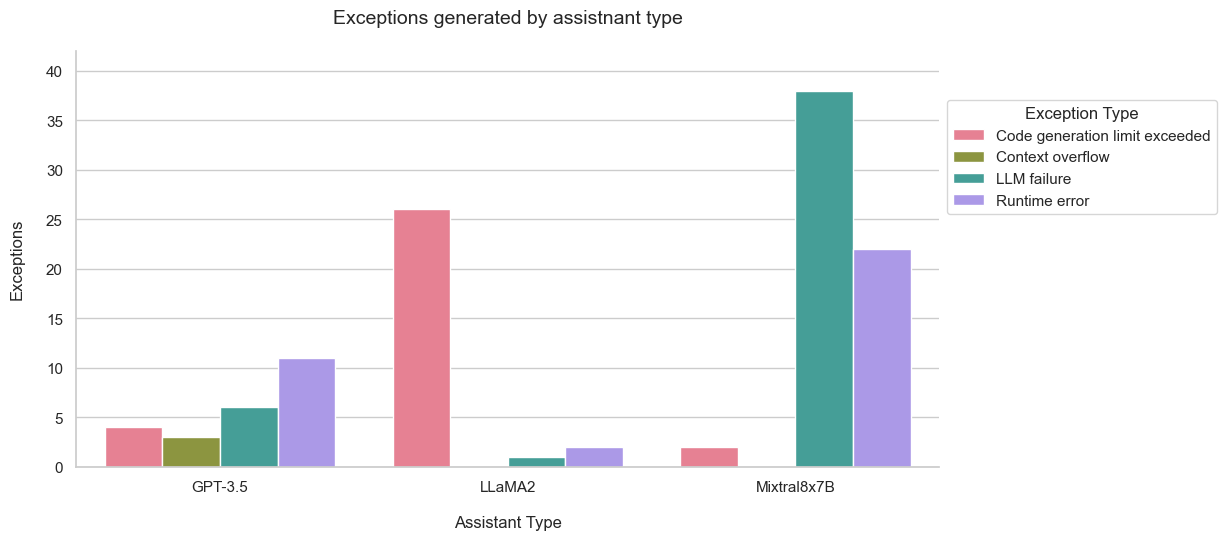

In [317]:
ax = sns.catplot(
    data=exceptions_df,
    x="code_assistant_type",
    y="counts",
    hue="merged_exceptions",
    kind="bar",
    aspect=1.9,
    palette='husl',
    legend_out=False,
)
plt.xlabel('Assistant Type', fontsize=12, labelpad=15)
plt.ylabel('Exceptions', fontsize=12, labelpad=15)
plt.title('Exceptions generated by assistnant type', fontsize=14, pad=20)
plt.ylim(0, 42)  # Set Y-axis limits

ax._legend.set_bbox_to_anchor((1, 0.9))  # Adjust legend position

new_title = 'Exception Type'
ax._legend.set_title(new_title)


#plt.show()
plt.savefig('exceptions.png', dpi=300, bbox_inches='tight')

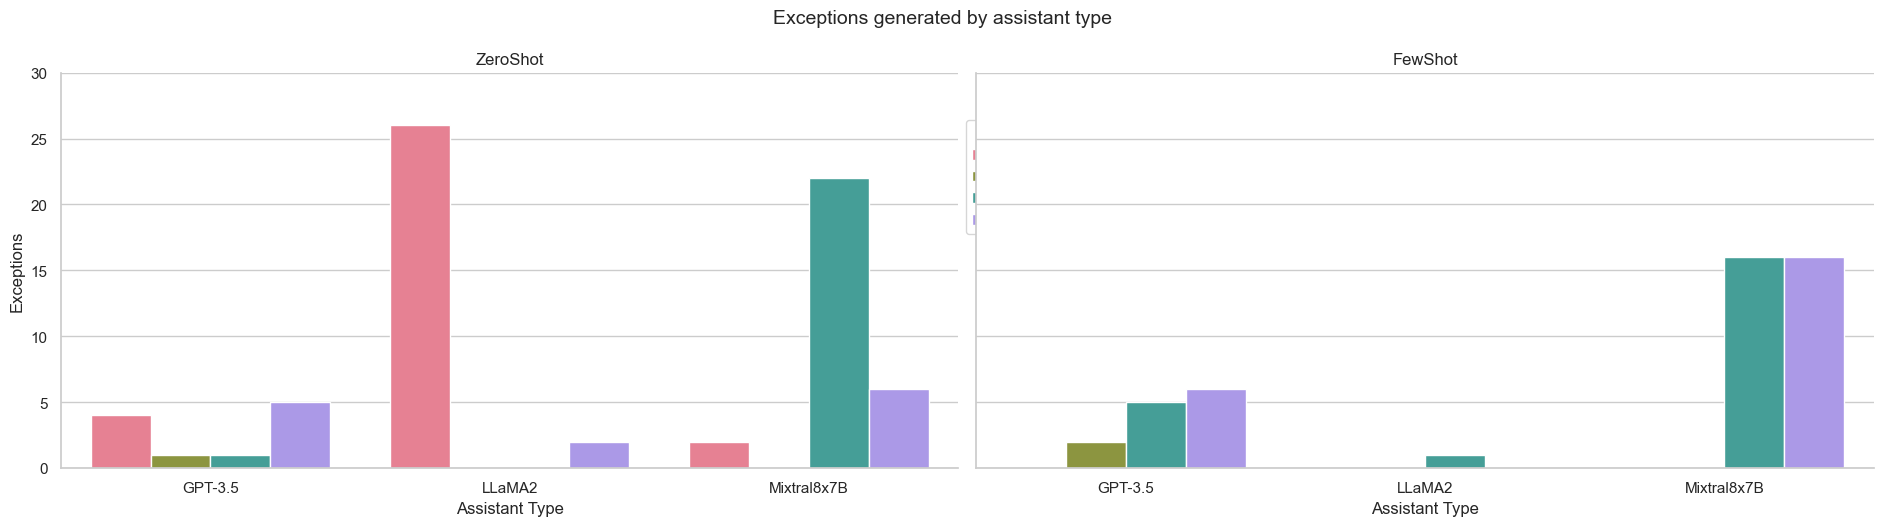

In [318]:
test = df.groupby(['merged_exceptions', 'code_assistant_type', 'prompt_type']).size().reset_index(name='counts')

ax = sns.catplot(
    data=test,
    x="code_assistant_type",
    y="counts",
    hue="merged_exceptions",
    kind="bar",
    aspect=1.9,
    palette='husl',
    col='prompt_type',
    legend_out=False,
)
ax.set_xlabels('Assistant Type', fontsize=12)
ax.set_ylabels('Exceptions', fontsize=12)
ax.fig.suptitle('Exceptions generated by assistant type', fontsize=14, y=1.05)
plt.ylim(0, 30)  # Set Y-axis limits
ax._legend.set_bbox_to_anchor((1, 0.9))  # Adjust legend position
for axes, title in zip(ax.axes.flat, ['ZeroShot', 'FewShot']):
    axes.set_title(title)

new_title = 'Exception Type'
ax._legend.set_title(new_title)


plt.show()
#plt.savefig('exceptions_prompt.png', dpi=300, bbox_inches='tight')
# replace it with 2 heatmaps for each prompt type in percentage of total results

In [319]:
total_counts = df.groupby(['code_assistant_type', 'prompt_type']).size().reset_index(name='total_counts')
exception_counts = df.groupby(['code_assistant_type', 'prompt_type', 'merged_exceptions']).size().reset_index(name='exception_counts')
merged = pd.merge(exception_counts, total_counts, on=['code_assistant_type', 'prompt_type'])
merged['percentage'] = (merged['exception_counts'] / merged['total_counts'])

merged

,code_assistant_type,prompt_type,merged_exceptions,exception_counts,total_counts,percentage
0,GPT-3.5,FewShot,Context overflow,2,40,0.050000
1,GPT-3.5,FewShot,LLM failure,5,40,0.125000
2,GPT-3.5,FewShot,Runtime error,6,40,0.150000
3,GPT-3.5,ZeroShot,Code generation limit exceeded,4,43,0.093023
4,GPT-3.5,ZeroShot,Context overflow,1,43,0.023256
5,GPT-3.5,ZeroShot,LLM failure,1,43,0.023256
6,GPT-3.5,ZeroShot,Runtime error,5,43,0.116279
7,LLaMA2,FewShot,LLM failure,1,38,0.026316
8,LLaMA2,ZeroShot,Code generation limit exceeded,26,40,0.650000
9,LLaMA2,ZeroShot,Runtime error,2,40,0.050000


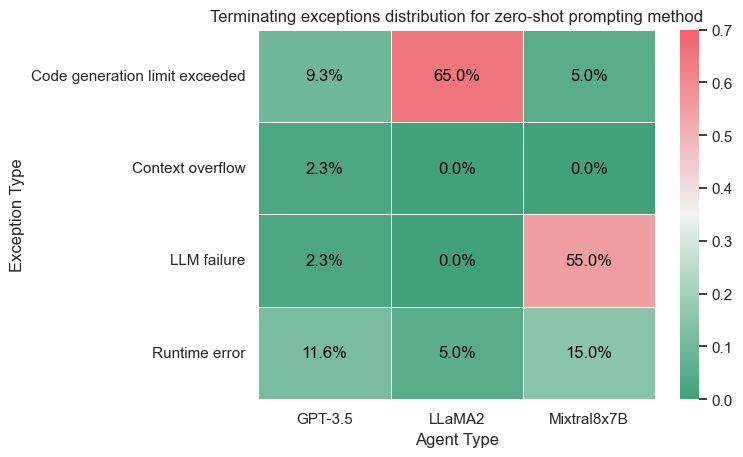

In [344]:
def percentage_formatter(x):
    return '{:.2f}%'.format(x)

pastel_palette = sns.diverging_palette(150, 10, s=80, l=60, n=7, as_cmap=True)

sns.heatmap(
            merged[merged['prompt_type'] == 'ZeroShot'].pivot(index="merged_exceptions", columns="code_assistant_type", values="percentage").fillna(0),
            annot=True,
            cmap=pastel_palette,
            fmt=".1%",
            linewidths=.5,
            vmin=0,
            vmax=0.7,
            annot_kws={'color': 'black'}
            )
plt.title('Terminating exceptions distribution for zero-shot prompting method')
plt.xlabel('Agent Type')
plt.ylabel('Exception Type')
#plt.show()
plt.savefig('zero_shot_exception_distribution.png', dpi=300, bbox_inches='tight')

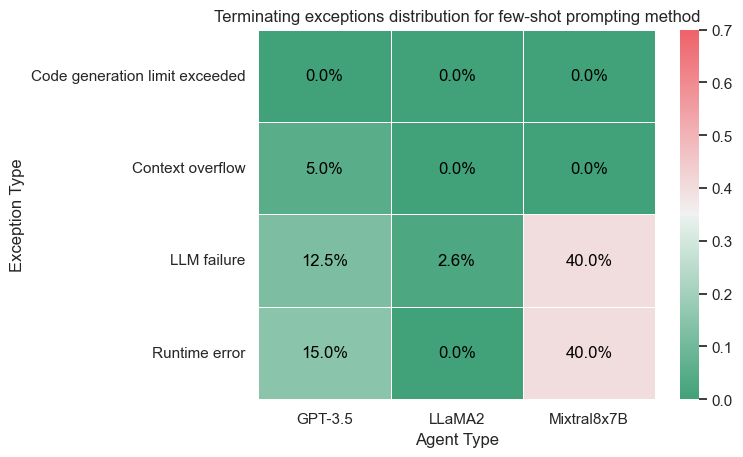

In [339]:
table = merged[merged['prompt_type'] == 'FewShot'].pivot(index="merged_exceptions", columns="code_assistant_type", values="percentage").fillna(0)
if 'Code generation limit exceeded' not in table.index:
    new_row = pd.DataFrame(0, index=['Code generation limit exceeded'], columns=table.columns)
    table = pd.concat([new_row, table])


sns.heatmap(
            table,
            annot=True,
            cmap=pastel_palette,
            fmt=".1%",
            linewidths=.5,
            vmin=0,
            vmax=0.7,
            annot_kws={'color': 'black'}
            )
plt.title('Terminating exceptions distribution for few-shot prompting method')
plt.xlabel('Agent Type')
plt.ylabel('Exception Type')
plt.savefig('few_shot_exception_distribution.png', dpi=300, bbox_inches='tight')
#plt.show()

# Human feedback analysis

In [345]:

df = pd.read_csv('human_feedback.csv', sep=',', header=0)
df.rename(columns={
                        'Analysis 1': 'LLaMA2 Zero Shot',
                        'Analysis 2': 'GPT-3.5 Zero Shot',
                        'Analysis 3': 'Mixtral8x7B Zero Shot',
                        'Analysis 4': 'LLaMA2 Few Shot',
                        'Analysis 5': 'GPT-3.5 Few Shot',
                        'Analysis 6': 'Mixtral8x7B Few Shot',
                   }, inplace=True)

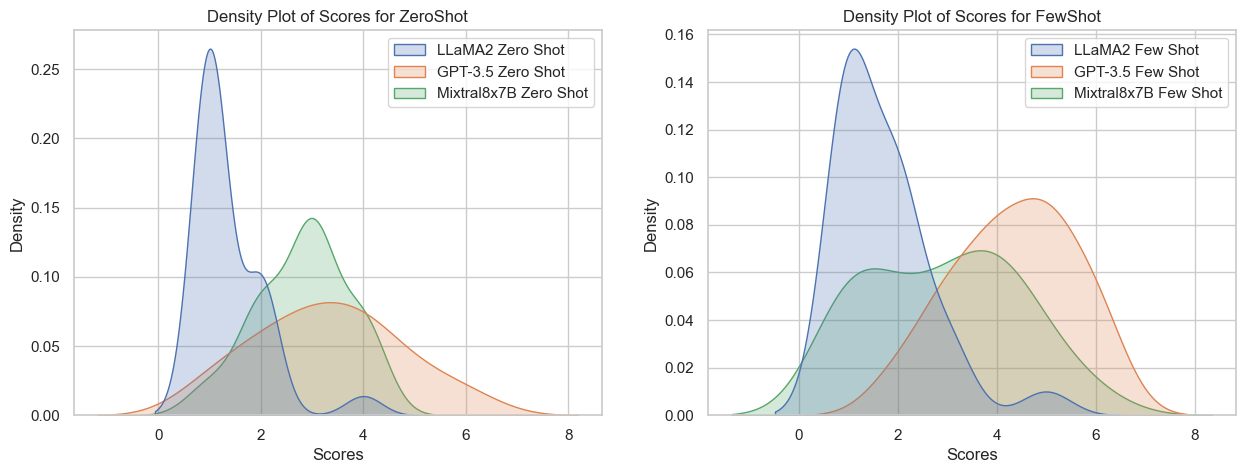

In [346]:
zero_shot_data = df.filter(like='Zero Shot')
few_shot_data = df.filter(like='Few Shot')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(data=zero_shot_data, ax=axes[0], fill=True)
axes[0].set_title('Density Plot of Scores for ZeroShot')
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Density')

# Few Shot Density Plot
sns.kdeplot(data=few_shot_data, ax=axes[1], fill=True)
axes[1].set_title('Density Plot of Scores for FewShot')
axes[1].set_xlabel('Scores')
axes[1].set_ylabel('Density')
plt.savefig('human_feedback_density.png', dpi=300, bbox_inches='tight')


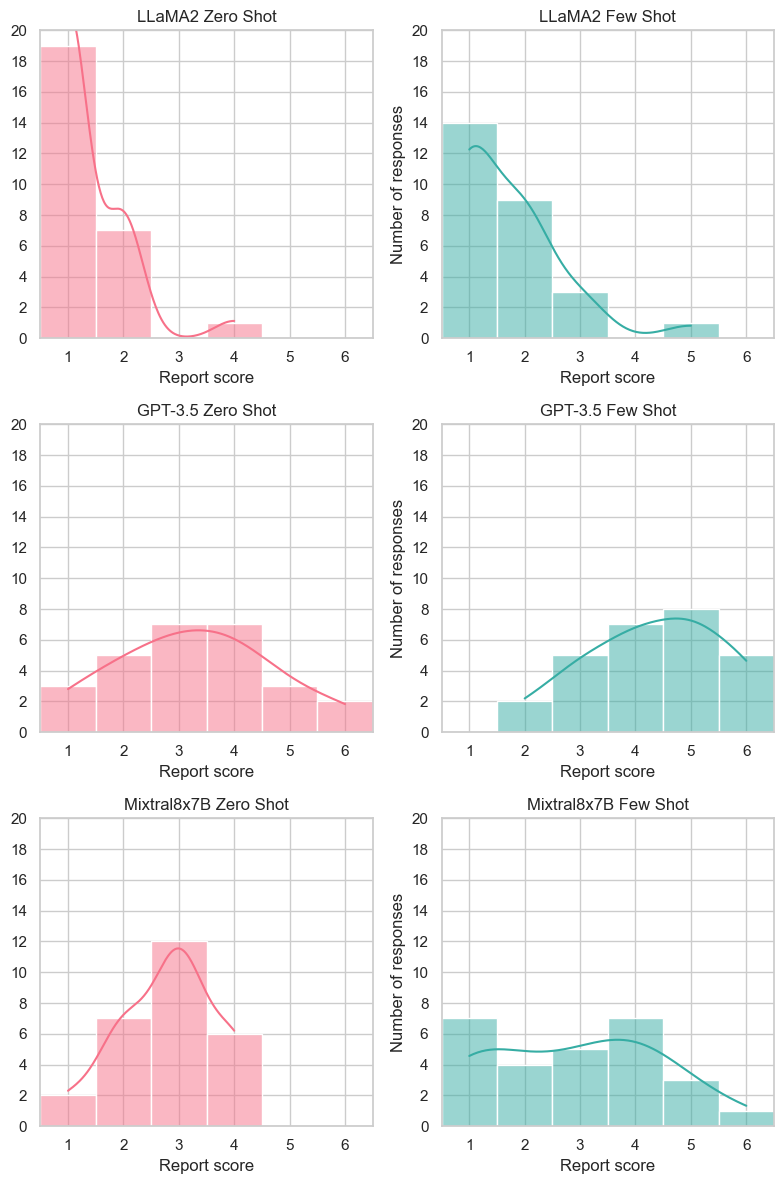

In [347]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(8, 12))

# Titles for the columns
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

# Loop through the DataFrame's columns and create distplots
index = {
    1: 1,
    2: 3,
    3: 5,
    4: 2,
    5: 4,
    6: 6,

}
colors = sns.color_palette("husl", 2)

for i, column in enumerate(df.columns):
    plt.subplot(3, 2, index[i + 1])
    sns.histplot(
        df[column],
        kde=True,
        discrete=True,
        bins=bin_edges,
        color=colors[0 if index[i + 1] % 2 != 0 else 1],
    )
    plt.xlim(0.5, 6.5)
    plt.xticks(range(1, 7))
    plt.title(column)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylim(0, 20)

    if index[i + 1] % 2 == 0:
        plt.ylabel('Number of responses')
    else:
        plt.ylabel('')

    plt.xlabel("Report score")

plt.tight_layout()
#plt.show()
plt.savefig('human_feedback_histogram.png', dpi=300, bbox_inches='tight')